# Machine learning with Logistic Regression 

### Problem Statement: 
Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression.

In [1]:
# Importing libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
import statsmodels.api as smapi
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

### Read the data 

In [2]:
# Read the data  
vaccine = pd.read_csv(r"D:\new Data science class\project\2. logistic regression\Vaccine Usage Prediction\Dataset\h1n1_vaccine_prediction.csv")

In [58]:
# Primary Data Inspection
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


### Data fields
* unique_id -- Unique identifier for each respondent 
* h1n1_worry -- Worry about the h1n1 flu(0,1,2,3) 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried 
* h1n1_awareness -- Signifies the amount of knowledge or understanding the respondent has about h1n1 flu - (0,1,2) - 0=No knowledge, 1=little knowledge, 2=good knowledge 
* antiviral_medication-- Has the respondent taken antiviral vaccination - (0,1) 
* contact_avoidance-- Has avoided any close contact with people who have flu-like symptoms - (0,1) 
* bought_face_mask -- Has the respondent bought mask or not - (0,1) 
* wash_hands_frequently-- Washes hands frequently or uses hand sanitizer - (0,1)
* avoid_large_gatherings-- Has the respondent reduced time spent at large gatherings - (0,1) 
* reduced_outside_home_cont-- Has the respondent reduced contact with people outside their own house - (0,1) 
* avoid_touch_face -- Avoids touching nose, eyes, mouth - (0,1) 
* dr_recc_h1n1_vacc-- Doctor has recommended h1n1 vaccine - (0,1) 
* dr_recc_seasonal_vacc-- The doctor has recommended seasonalflu vaccine - (0,1) 
* chronic_medic_condition-- Has any chronic medical condition - (0,1) 
* cont_child_undr_6_mnth -- Has regular contact with child the age of 6 months - (0,1) 
* is_health_worker-- Is respondent a health worker - (0,1) 
* has_health_insur-- Does respondent have health insurance - (0,1) 
* is_h1n1_vacc_effective-- Does respondent think that the h1n1 vaccine is effective - (1,2,3,4,5)- (1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective, 5=Thinks it is highly effective) 
* is_h1n1_risky-- What respondents think about the risk of getting ill with h1n1 in the absence of the vaccine- (1,2,3,4,5)- (1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=don’t know if it is risky or not, 4=Thinks it is a somewhat high risk, 5=Thinks it is very highly risky) 
* sick_from_h1n1_vacc-- Does respondent worry about getting sick by taking the h1n1 vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know, 4=Respondent is somewhat worried, 5Respondent is very worried) * is_seas_vacc_effective-- Does respondent think that the seasonal vaccine is effective- (1,2,3,4,5)- (1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective, 5=Thinks it is highly effective) 
* is_seas_flu_risky-- What respondenst think about the risk of getting ill with seasonal flu in the absence of the vaccine- (1,2,3,4,5)- (1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=Doesn't know if it is risky or not, 4=Thinks it is somewhat high risk, 5=Thinks it is very highly risky) 
* sick_from_seas_vacc-- Does respondent worry about getting sick by taking the seasonal flu vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know, 4=Respondent is somewhat worried, 5Respondent is very worried) 
* age_bracket-- Age bracket of the respondent - (18 - 34 Years, 35 - 44 Years, 45 - 54 Years, 55 - 64 Years, 64+ Years) 
* qualification -- Qualification/education level of the respondent as per their response -(<12 Years, 12 Years, College Graduate, Some College) 
* race -- Respondent's race - (White, Black, Other or Multiple ,Hispanic) 
* sex -- Respondent's sex - (Female, Male) 
* income_level-- Annual income of the respondent as per the 2008 poverty Census - (<= 75000−AbovePoverty,> 75000−AbovePoverty,>75000, Below Poverty) 
* marital_status-- Respondent's marital status - (Not Married, Married) 
* housing_status -- Respondent's housing status - (Own, Rent) 
* employment -- Respondent's employment status - (Not in Labor Force, Employed, Unemployed) 
* census_msa -- Residence of the respondent with the MSA(metropolitan statistical area)(Non-MSA, MSA-Not Principle, CityMSA-Principle city) - (Yes, no)
* no_of_adults-- Number of adults in the respondent's house (0,1,2,3) - (Yes, no) 
* no_of_children-- Number of children in the respondent's house(0,1,2,3) - (Yes, No) 
* h1n1_vaccine (Dependent variable)--Did the respondent received the h1n1 vaccine or not(1,0) - (Yes, No)

### EDA

In [59]:
# No of rows and columns in data
vaccine.shape

(26707, 34)

In [60]:
# Checking all the columns in data
vaccine.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [5]:
# droping unwanted columns 
#'unique_id' --> as it is not required for analysis

vaccine.drop(columns = ['unique_id'], axis = 1, inplace = True )

# Checking wheter unique id column has been dropped properly
vaccine.head()
vaccine.shape

(26707, 33)

In [62]:
# checking info 
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

Primary analysis shows that 
* There are nulls in some columns 
* There are different types od datatypes

In [6]:
# splitting into numeric and categorical columns for detailed analysis 

nc = vaccine.select_dtypes(exclude= 'object').columns.values
fc = vaccine.select_dtypes(include='object').columns.values
nc,fc

(array(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
        'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
        'avoid_large_gatherings', 'reduced_outside_home_cont',
        'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
        'chronic_medic_condition', 'cont_child_undr_6_mnths',
        'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
        'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
        'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
        'no_of_children', 'h1n1_vaccine'], dtype=object),
 array(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
        'marital_status', 'housing_status', 'employment', 'census_msa'],
       dtype=object))

In [64]:
# checking missing values in percentage

no_null = vaccine.isnull().sum()
per_null = vaccine.isnull().sum()*100/len(vaccine)
df = pd.DataFrame(zip(no_null,per_null),columns=['no_null','per_null'],index=vaccine.columns)
df

,no_null,per_null
h1n1_worry,92,0.344479
h1n1_awareness,116,0.434343
antiviral_medication,71,0.265848
contact_avoidance,208,0.778822
bought_face_mask,19,0.071142
wash_hands_frequently,42,0.157262
avoid_large_gatherings,87,0.325757
reduced_outside_home_cont,82,0.307036
avoid_touch_face,128,0.479275
dr_recc_h1n1_vacc,2160,8.087767


#### Handling missing values

In [7]:
# filling missing values in numeric data with median 

for col in nc:
    vaccine[col] = vaccine[col].fillna(vaccine[col].median()) 

In [66]:
# checking wether missing values have been imputed properly 
vaccine.isnull().sum()

h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [8]:
# filling missing values in categorical data with "missing"

for col in fc:
    vaccine[col]= vaccine[col].fillna("missing")

In [68]:
vaccine.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

#### Check for multicolinearity 

<AxesSubplot:>

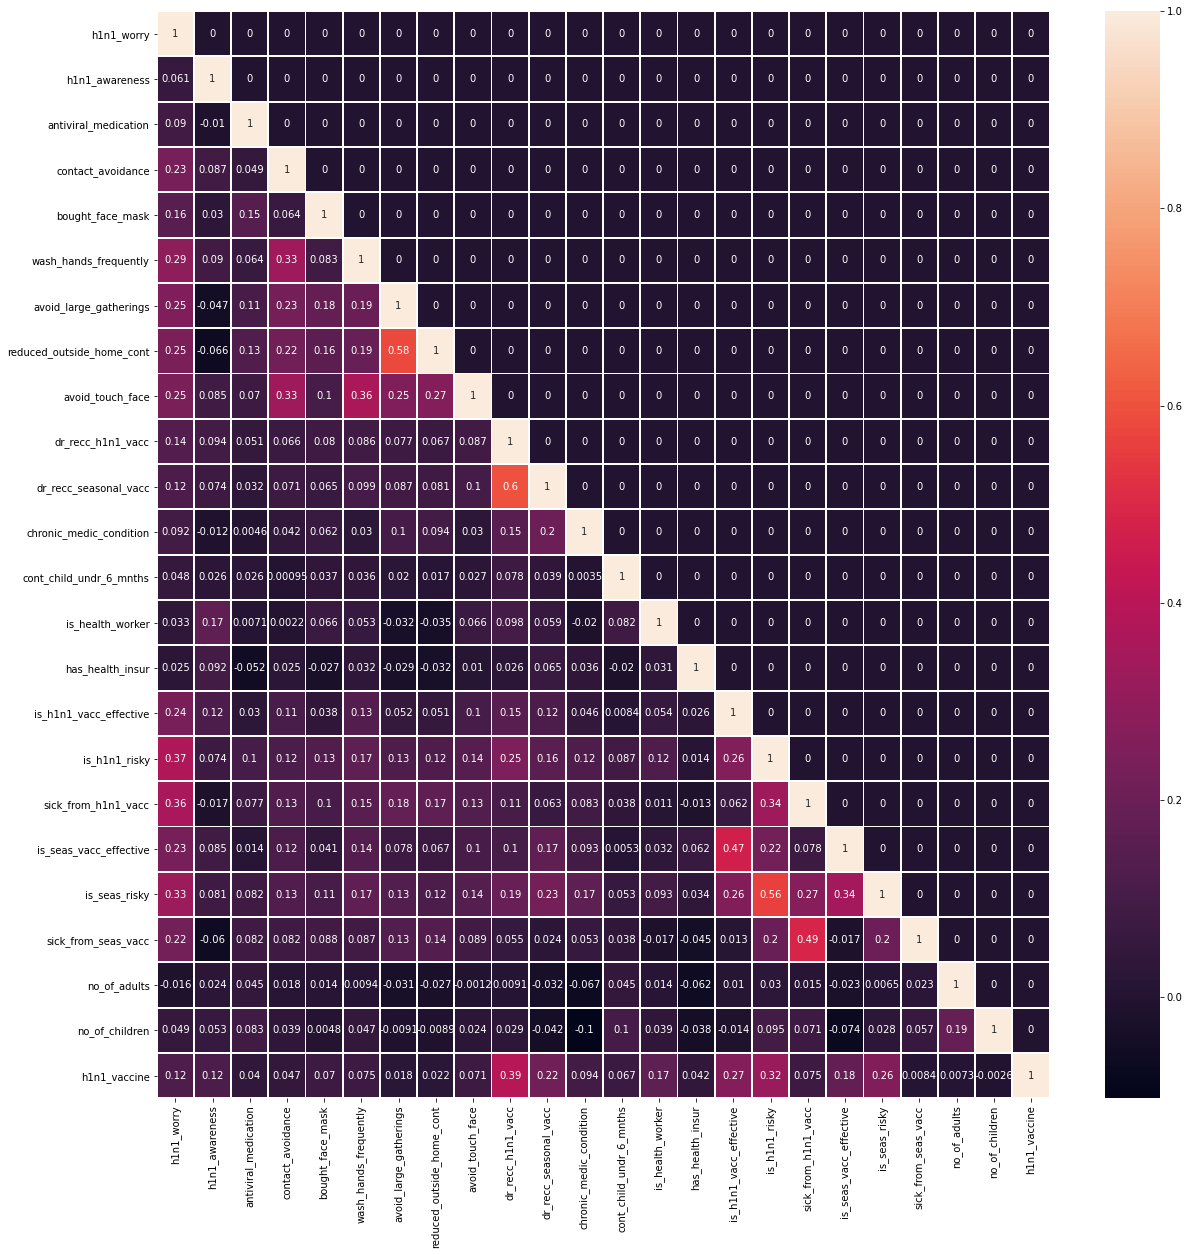

In [70]:
# check for multicolinearity in numeric columns
cor = np.tril(vaccine[nc].corr())

plt.figure(figsize=(20,20))
sns.heatmap(cor, annot= True, xticklabels = nc,yticklabels= nc, square= False, linewidths=1)

From the graph it can be infered that there is no multicolinearity in features that is greater than 0.6

In [9]:
# check distribution of y variable 
vaccine.h1n1_vaccine.value_counts()   

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

The Y-(target) variable is unevenly distributed. Lets see how this affects the model. 

### Pre- processing of data 

#### Convert factoral features into dummy variables

In [16]:
# convert factors to dummy variables
vaccine_new = vaccine.copy()

for c in fc:
    dummy = pd.get_dummies(vaccine_new[c],drop_first= True, prefix= c)
    vaccine_new = vaccine_new.join(dummy)
print(vaccine_new.columns)

# remove old factor variables 
vaccine_new.drop(columns=fc, inplace = True)
vaccine_new.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'qualification_missing', 'race_Hispanic', 'ra

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'qualification_missing', 'race_Hispanic', 'race_Other or Multiple',
       'race_White', 'sex_Male', 'income_level_> $75,000',
       'income_level_Below Poverty', 'income_level_missing'

### Functions for splitting data, builing model, printing confusion matrix and classification report 

In [32]:
# functions 

# split data into train and test 
def splitData(data,y,ratio):
    trainx,testx,trainy,testy = train_test_split(data.drop(y,1),
                                                data[y],
                                                test_size= ratio)
    return(trainx,testx,trainy,testy)

# build the model 
def buildModel(trainx,trainy):
    model = LogisticRegression().fit(trainx, trainy)
    return (model)

# confusion matrix and classification report  
def cm(actual,predicted):
    # confusion matrix
    df = pd.DataFrame({'actual':actual,'predicted':predicted})
    print(pd.crosstab(df.actual,df.predicted, margins = True))
    
    print("\n")
    
    # classification report
    print(classification_report(actual,predicted))

#### Splitting the data 

In [74]:
# split the data 
trainx1,testx1,trainy1,testy1= splitData(vaccine_new,'h1n1_vaccine',0.3)

trainx1.shape,trainy1.shape
testx1.shape,testy1.shape

((8013, 47), (8013,))

### Model 1

In [75]:
# build the model 
m1 = buildModel(trainx1,trainy1)

In [ ]:
# prediction 
p1 = m1.predict(testx1)
p1

In [77]:
# print confusion matrix and classification report
cm(testy1,p1)

predicted     0     1   All
actual                     
0          5965   373  6338
1           982   693  1675
All        6947  1066  8013


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6338
           1       0.65      0.41      0.51      1675

    accuracy                           0.83      8013
   macro avg       0.75      0.68      0.70      8013
weighted avg       0.82      0.83      0.82      8013



This model has overall accuracy of 83% but precision, recall and f1-score are highly biased towards class 0

### Model 2 

We will build the next model by tuning the class_weight parameter in Logistic Regression as the target variable is highly unbalanced

In [80]:
# model two 
m2 = LogisticRegression(class_weight={0:0.20,1:0.80}).fit(trainx1,trainy1)

In [81]:
# prediction 
p2 = m2.predict(testx1)
p2

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [82]:
# print confusion matrix and classification report
cm(testy1,p2)

predicted     0     1   All
actual                     
0          4879  1459  6338
1           440  1235  1675
All        5319  2694  8013


              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6338
           1       0.46      0.74      0.57      1675

    accuracy                           0.76      8013
   macro avg       0.69      0.75      0.70      8013
weighted avg       0.82      0.76      0.78      8013



This model has overall accuracy of 76% which is less than the previous model1 but recall has somewhat balanced on both the classes 

### Handling unbalanced data using SMOTE

In [44]:
x = vaccine_new.drop('h1n1_vaccine',1)
y = vaccine_new.h1n1_vaccine

In [45]:
# Sampling of data 
sm = SMOTE()
smX,smY= sm.fit_resample(x,y)

In [46]:
# create new dataset 
vaccine_smote = smX.join(smY)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

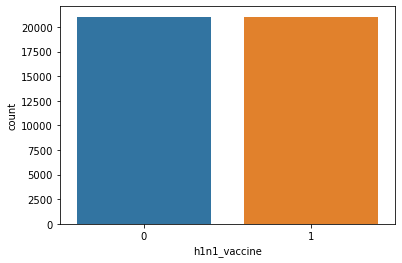

In [47]:
# after oversampling check the distribution of y variable 
sns.countplot(x=vaccine_smote.h1n1_vaccine,data= vaccine_smote)

In [49]:
# split the data 
trainx2,testx2,trainy2,testy2= splitData(vaccine_smote,'h1n1_vaccine',0.3)
print(trainx2.shape,trainy2.shape)
print(testx2.shape,testy2.shape)

(29446, 47) (29446,)
(12620, 47) (12620,)


### Model 3 

We will build this model with data that is sampled by using SMOTE technique

In [50]:
# build the model 
m3 = buildModel(trainx2,trainy2)

In [51]:
# prediction 
p3 = m3.predict(testx2)
p3

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [52]:
# print confusion matrix and classification report
cm(testy2,p3)

predicted     0     1    All
actual                      
0          5187  1177   6364
1          1276  4980   6256
All        6463  6157  12620


              precision    recall  f1-score   support

           0       0.80      0.82      0.81      6364
           1       0.81      0.80      0.80      6256

    accuracy                           0.81     12620
   macro avg       0.81      0.81      0.81     12620
weighted avg       0.81      0.81      0.81     12620



This model shows an overall accuracy of 81% and has balanced values of precision,recall as well as f1 score

### Feature engineering 

* 1) Combining all the behavioural columns togeter to get behaviour score
* 2) Combining opinion columns togeter to get an opinion score 
* 3) In column race, race other than white show less representation hence combing them to form a single group

In [60]:
# Making a copy of data for feature engineering so that we do not tamper with our original data 
vaccine2= vaccine.copy()

In [61]:
# checking the columns in data 
vaccine2.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [62]:
# combining all the behavioural coumns togeter to get behaviour score 
behaviour_cols = ['contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face']
vaccine2["behaviour_score"]= vaccine2[behaviour_cols].sum(axis = 1)
vaccine2.drop(columns=behaviour_cols,inplace=True)

In [63]:
vaccine2.head(5)

,h1n1_worry,h1n1_awareness,antiviral_medication,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,...,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,behaviour_score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,2.0
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,4.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,1.0
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,3.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,4.0


In [64]:
# similarly combining opinion columns togeter to get an opinion score 
opinion_cols = ['is_h1n1_vacc_effective','is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
               'is_seas_risky', 'sick_from_seas_vacc']

vaccine2["opinion_score"]= vaccine2[opinion_cols].sum(axis=1)
vaccine2.drop(columns = opinion_cols, inplace = True )

In [65]:
vaccine2.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,age_bracket,...,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,behaviour_score,opinion_score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55 - 64 Years,...,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,2.0,11.0
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35 - 44 Years,...,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,4.0,23.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,18 - 34 Years,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,1.0,12.0
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,65+ Years,...,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,3.0,21.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45 - 54 Years,...,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,4.0,16.0


In [66]:
vaccine2.race.value_counts()
# as race other than white show less representation combing them to form a single group

vaccine2["race"] = vaccine2["race"].replace(['Black','Hispanic','Other or Multiple'],'other')

In [67]:
vaccine2.race.value_counts()

White    21222
other     5485
Name: race, dtype: int64

#### Splitting features into factoral and numeric 

In [68]:
# split columns into numeric and factoral
nc = vaccine2.select_dtypes(exclude= 'object').columns.values
fc = vaccine2.select_dtypes(include='object').columns.values
nc,fc

(array(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
        'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
        'chronic_medic_condition', 'cont_child_undr_6_mnths',
        'is_health_worker', 'has_health_insur', 'no_of_adults',
        'no_of_children', 'h1n1_vaccine', 'behaviour_score',
        'opinion_score'], dtype=object),
 array(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
        'marital_status', 'housing_status', 'employment', 'census_msa'],
       dtype=object))

#### Converting factoral features into dummy using one hot encoding 

In [69]:
# create dummy variable for factoral columns 
vaccine2_new = vaccine2.copy()

for c in fc:
    dummy = pd.get_dummies(vaccine2_new[c],drop_first= True, prefix= c)
    vaccine2_new = vaccine2_new.join(dummy)
print(vaccine2_new.columns)

# remove old factor variables 
vaccine2_new.drop(columns=fc, inplace = True)
vaccine2_new.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur',
       'age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine', 'behaviour_score',
       'opinion_score', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'qualification_missing', 'race_other', 'sex_Male',
       'income_level_> $75,000', 'income_level_Below Poverty',
       'income_level_missing', 'marital_status_Not Married',
       'marital_status_missing', 'housing_status_Rent',
       'housing_status_missing', 'employment_Not in Labor Force',
       'emplo

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'has_health_insur',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine', 'behaviour_score',
       'opinion_score', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'qualification_missing', 'race_other', 'sex_Male',
       'income_level_> $75,000', 'income_level_Below Poverty',
       'income_level_missing', 'marital_status_Not Married',
       'marital_status_missing', 'housing_status_Rent',
       'housing_status_missing', 'employment_Not in Labor Force',
       'employment_Unemployed', 'employment_missing',
       'census_msa_MSA, Principle City', 'census_msa_Non-MSA'],
      dtype='object')

In [70]:
x = vaccine2_new.drop('h1n1_vaccine',1)
y = vaccine2_new.h1n1_vaccine

#### Sampling the Feature Engineered data using Smote 

In [78]:
# Sampling the data 
sm = SMOTE()
smX,smY= sm.fit_resample(x,y)

In [72]:
# create new dataset 
vaccine2_smote = smX.join(smY)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

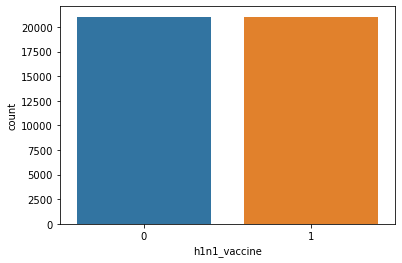

In [73]:
# after oversampling check the distribution of y variable 
sns.countplot(x=vaccine2_smote.h1n1_vaccine,data= vaccine2_smote)

#### Splitting the data

In [74]:
# split the data 
trainx3,testx3,trainy3,testy3= splitData(vaccine2_smote,'h1n1_vaccine',0.3)

print(trainx3.shape,trainy3.shape)
print(testx3.shape,testy3.shape)

(29446, 35) (29446,)
(12620, 35) (12620,)


### Model 4

We will build this model using data that has columns that we have created as part of Feature Engineering 

In [75]:
# build the model 
m4 = buildModel(trainx3,trainy3)

In [76]:
# prediction 
p4 = m4.predict(testx3)
p4

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [77]:
# print confusion matrix and classification report
cm(testy3,p4)

predicted     0     1    All
actual                      
0          5045  1244   6289
1          1541  4790   6331
All        6586  6034  12620


              precision    recall  f1-score   support

           0       0.77      0.80      0.78      6289
           1       0.79      0.76      0.77      6331

    accuracy                           0.78     12620
   macro avg       0.78      0.78      0.78     12620
weighted avg       0.78      0.78      0.78     12620



The overall accuracy for this model is 78%  which is less than model 3 

### Model 5 : Using logit model from statsmodel

In [79]:
# Model 5 : Logit model
model5 = smapi.Logit(trainy2,trainx2).fit()
p5= model5.predict(testx2)

Optimization terminated successfully.
         Current function value: 0.436345
         Iterations 7


In [80]:
# Model Summary :
print(model5.summary())

                           Logit Regression Results                           
Dep. Variable:           h1n1_vaccine   No. Observations:                29446
Model:                          Logit   Df Residuals:                    29399
Method:                           MLE   Df Model:                           46
Date:                Mon, 17 Jan 2022   Pseudo R-squ.:                  0.3705
Time:                        19:50:23   Log-Likelihood:                -12849.
converged:                       True   LL-Null:                       -20410.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
h1n1_worry                        -0.0848      0.022     -3.898      0.000      -0.127      -0.042
h1n1_awareness                     0.1667      0.029      5.680      0.

* Model is converged.
* model p value is below 0.05.
* The model summary shows the coefficent of each variables we used to create model.

In [40]:
# Defining Prediction Threshold:
def predictClass(probs,cutoff):
    if (0<=cutoff<=1):
        P = probs.copy()
        P[P < cutoff] = 0
        P[P > cutoff] = 1
    
    return(P.astype(int))

In [81]:
# Results on threshold of 0.5
pred1=predictClass(p5,0.5)

In [82]:
# final report of model performance.
cm(testy2,pred1)

predicted     0     1    All
actual                      
0          5152  1212   6364
1          1273  4983   6256
All        6425  6195  12620


              precision    recall  f1-score   support

           0       0.80      0.81      0.81      6364
           1       0.80      0.80      0.80      6256

    accuracy                           0.80     12620
   macro avg       0.80      0.80      0.80     12620
weighted avg       0.80      0.80      0.80     12620



This model shows an overall accuracy of 80% and has balanced values of precision,recall as well as f1 score

### Conclusion 
* Handling unbalanced data with SMOTE technique gives better results than using class weight parameter of logistic regression
* Feature Engineering that we did for this model reduced the accuracy for the model 
* Statsmodels offers modeling from the perspective of statistics. It gives a detailed summary of the model for interpretation 